In [5]:
#importing relevent libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [11]:
#Loading the dataset and creating dataframe
zomato_df = pd.read_csv("/content/zomato.csv", encoding='ISO-8859-1')
zomato_df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [34]:
#Merging the country code file with zomato file
country_df = pd.read_excel("/content/Country-Code.xlsx")
df= zomato_df.merge(country_df,on='Country Code')
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Exchange Rate(INR)
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,1.46
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,1.46
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,Phillipines,1.46
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines,1.46
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines,1.46


In [35]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country', 'Exchange Rate(INR)'],
      dtype='object')

<Axes: >

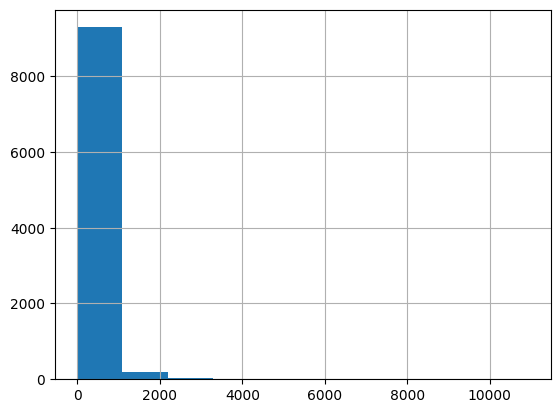

In [36]:
df['Votes'].hist()

<Axes: >

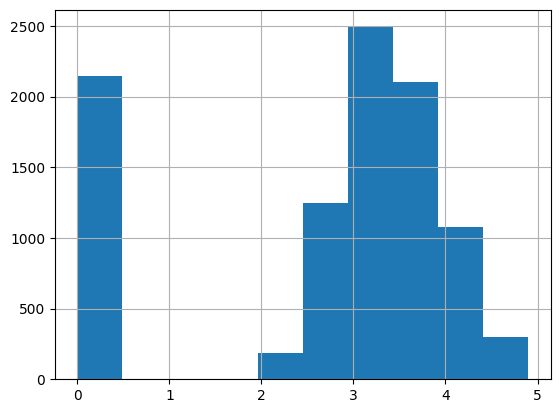

In [37]:
df['Aggregate rating'].hist()

In [38]:
#To remove the column which is not necessary
del df['Restaurant ID']
del df['Locality Verbose']
del df['Address']
del df['Country Code']
del df['Switch to order menu']
df.head()

,Restaurant Name,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Exchange Rate(INR)
0,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,1.46
1,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,1.46
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines,1.46
3,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines,1.46
4,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines,1.46


In [39]:
#To return no.of rows and no.of columns
df.shape

(9551, 18)

In [40]:
# Multiplying 'Exchange Rate' with average column for two for the converted cost
df['Converted Cost (INR)'] = df['Average Cost for two'] * df['Exchange Rate(INR)']

# Displaying the final DataFrame with new columns
print(df[['Country', 'Average Cost for two', 'Converted Cost (INR)']])


          Country  Average Cost for two  Converted Cost (INR)
0     Phillipines                  1100                1606.0
1     Phillipines                  1200                1752.0
2     Phillipines                  4000                5840.0
3     Phillipines                  1500                2190.0
4     Phillipines                  1500                2190.0
...           ...                   ...                   ...
9546       Turkey                    80                 206.4
9547       Turkey                   105                 270.9
9548       Turkey                   170                 438.6
9549       Turkey                   120                 309.6
9550       Turkey                    55                 141.9

[9551 rows x 3 columns]


In [41]:
df.head(5)

,Restaurant Name,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Exchange Rate(INR),Converted Cost (INR)
0,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,1.46,1606.0
1,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,1.46,1752.0
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines,1.46,5840.0
3,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines,1.46,2190.0
4,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines,1.46,2190.0


<Axes: >

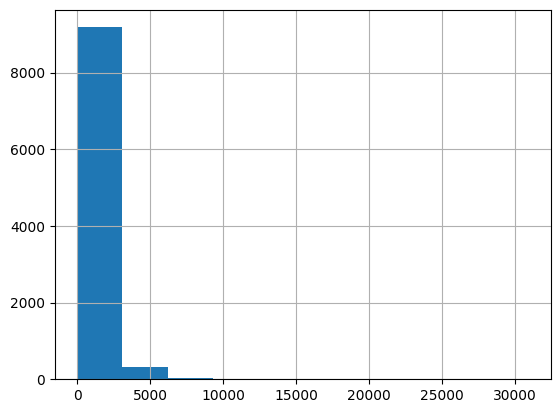

In [42]:
df['Converted Cost (INR)'].hist()

In [43]:
#To get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   City                  9551 non-null   object 
 2   Locality              9551 non-null   object 
 3   Longitude             9551 non-null   float64
 4   Latitude              9551 non-null   float64
 5   Cuisines              9542 non-null   object 
 6   Average Cost for two  9551 non-null   int64  
 7   Currency              9551 non-null   object 
 8   Has Table booking     9551 non-null   object 
 9   Has Online delivery   9551 non-null   object 
 10  Is delivering now     9551 non-null   object 
 11  Price range           9551 non-null   int64  
 12  Aggregate rating      9551 non-null   float64
 13  Rating color          9551 non-null   object 
 14  Rating text           9551 non-null   object 
 15  Votes                

In [44]:
#Check for missing values
df.isnull().sum().sort_values(ascending=False)

,0
Cuisines,9
City,0
Restaurant Name,0
Locality,0
Longitude,0
Latitude,0
Average Cost for two,0
Currency,0
Has Table booking,0
Has Online delivery,0


In [45]:
#To replace missing values
df['Cuisines'].fillna('Missing', inplace=True)

In [46]:
df.isnull().sum()

,0
Restaurant Name,0
City,0
Locality,0
Longitude,0
Latitude,0
Cuisines,0
Average Cost for two,0
Currency,0
Has Table booking,0
Has Online delivery,0


In [47]:
#Check for duplicate data
duplicate_data = df.duplicated().any()
print(duplicate_data)

False


In [48]:
#To give stastical information about the dataset
df[['Converted Cost (INR)', 'Price range', 'Aggregate rating', 'Votes']].describe()

,Converted Cost (INR),Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,815.764095,1.804837,2.666370,156.909748
std,1171.507863,0.905609,1.516378,430.169145
min,0.000000,1.000000,0.000000,0.000000
25%,300.000000,1.000000,2.500000,5.000000
50%,500.000000,2.000000,3.200000,31.000000
75%,833.800000,2.000000,3.700000,131.000000
max,30905.000000,4.000000,4.900000,10934.000000


<Figure size 1400x2400 with 0 Axes>

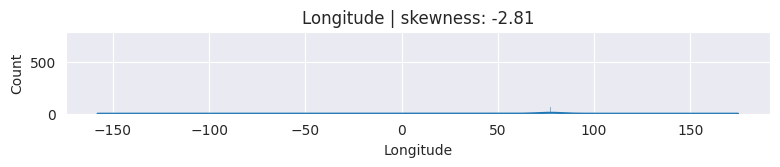

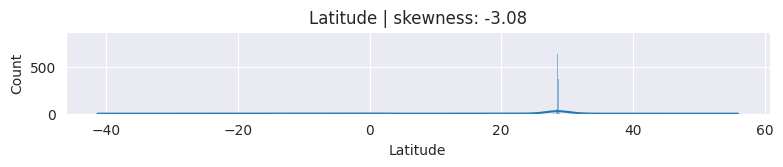

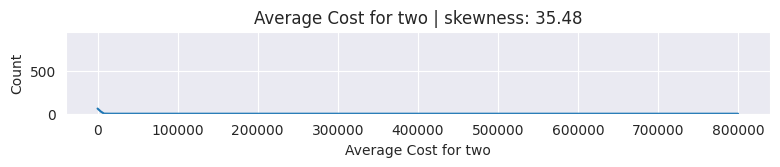

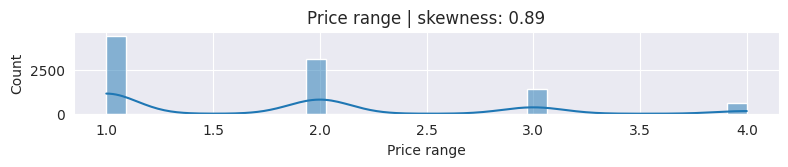

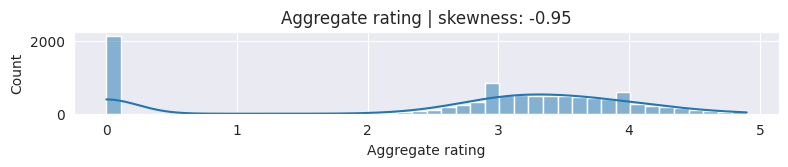

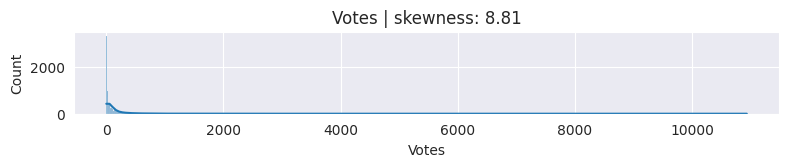

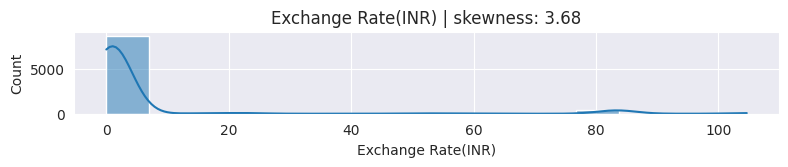

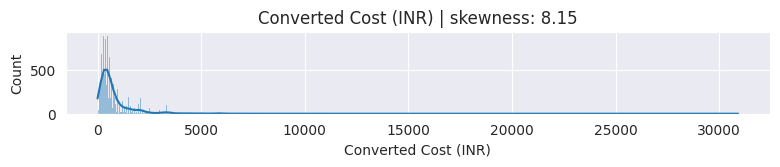

In [49]:
#To check for the distribution of data
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for i, feature in enumerate(numerical_columns, 1):
  plt.figure(figsize=(20,10))
  plt.subplot(len(numerical_columns), 2, i)
  sns.histplot(df[feature], kde=True)
  plt.title(f"{feature} | skewness: {round(df[feature].skew(), 2)}")
plt.show()

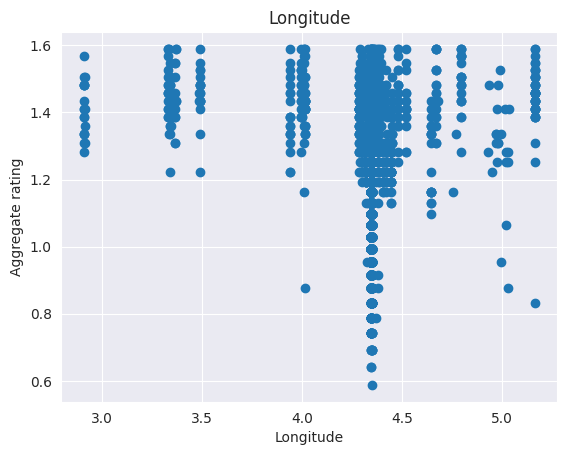

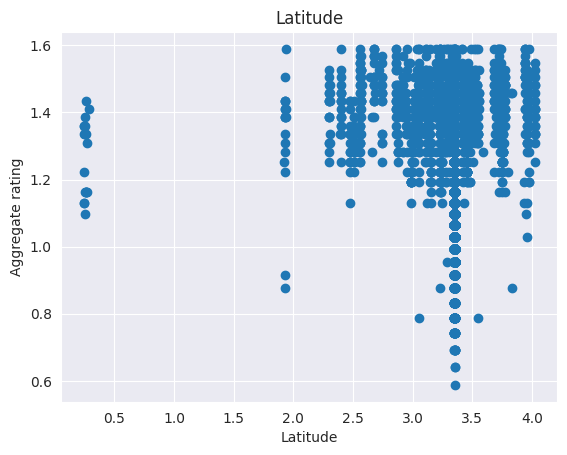

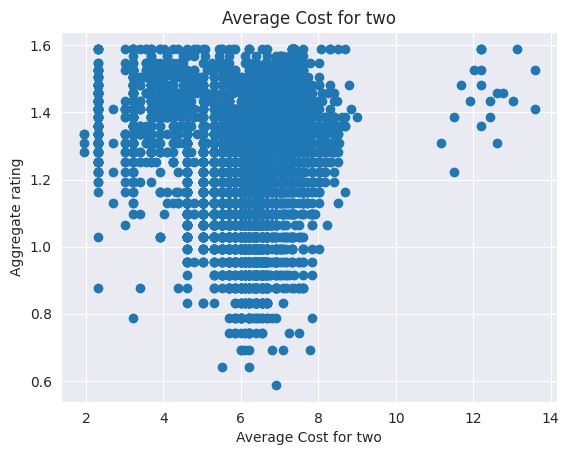

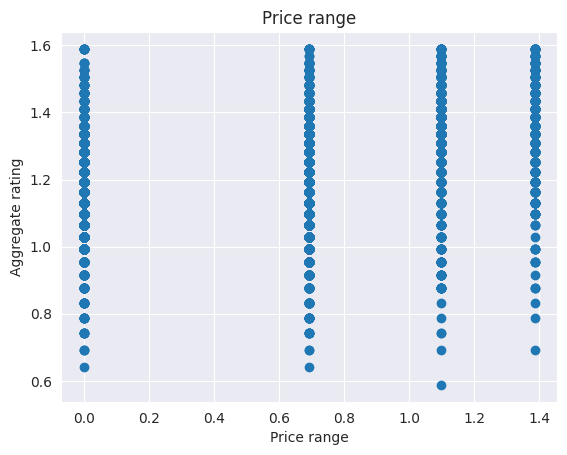

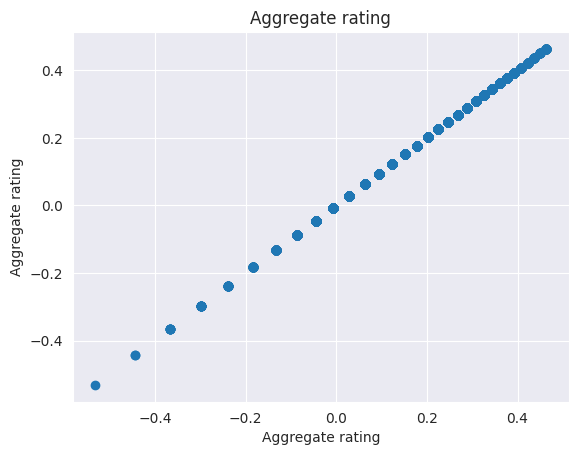

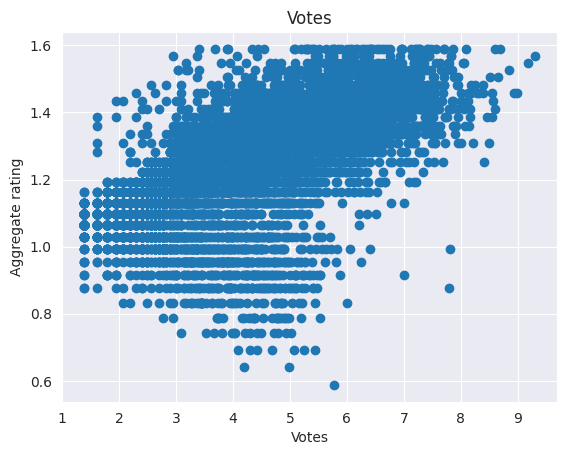

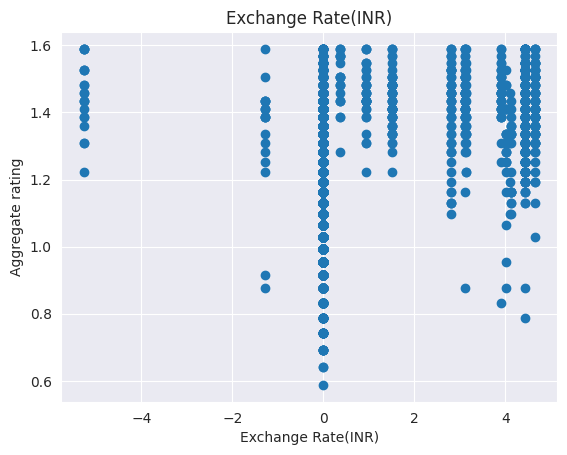

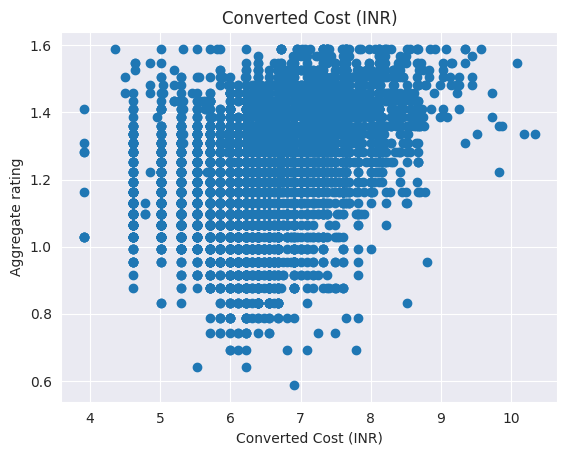

In [50]:
#Logarithmic transformation
for feature in numerical_columns:
  data=df.copy()
  data[feature]=np.log(data[feature])
  data['Aggregate rating']=np.log(data['Aggregate rating'])
  plt.scatter(data[feature], data['Aggregate rating'])
  plt.xlabel(feature)
  plt.ylabel('Aggregate rating')
  plt.title(feature)
  plt.show()

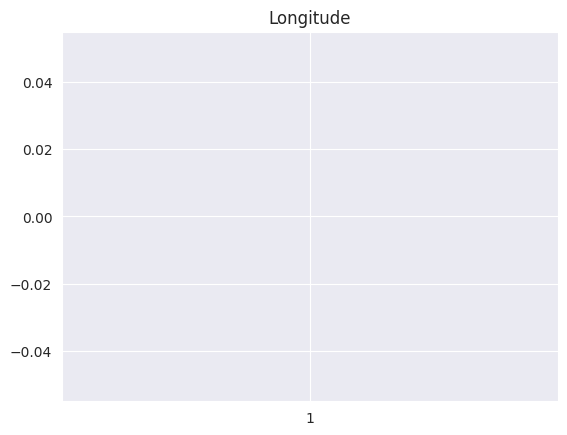

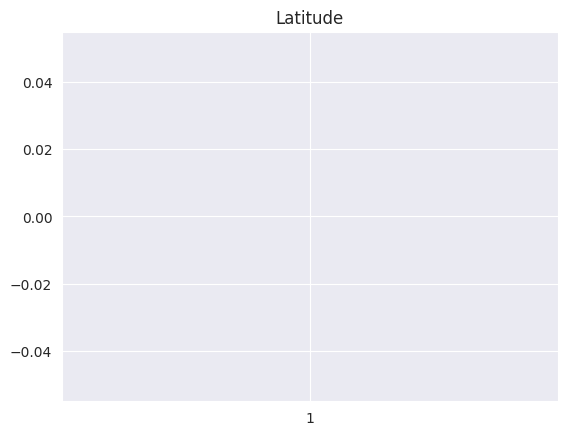

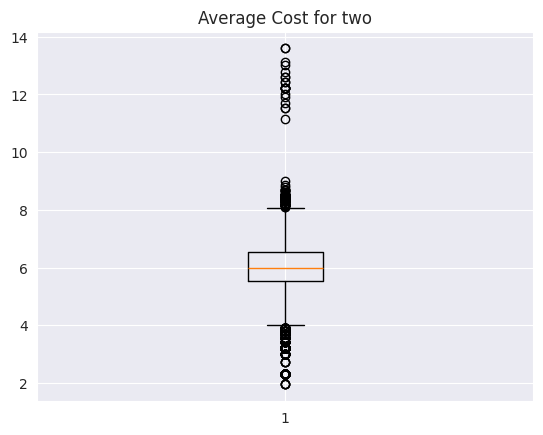

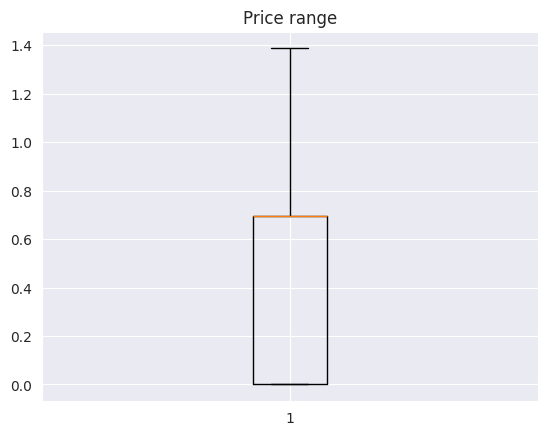

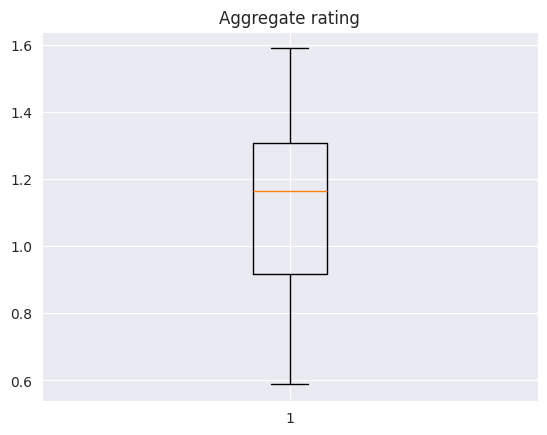

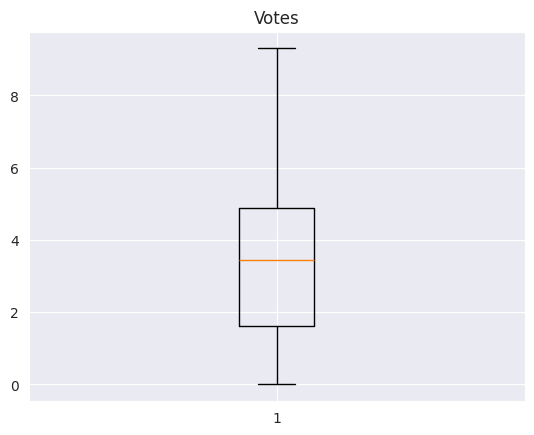

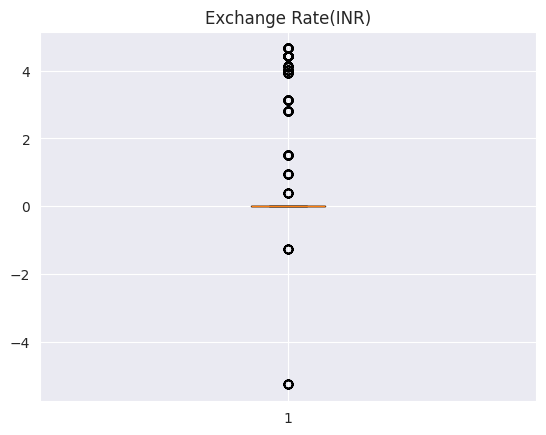

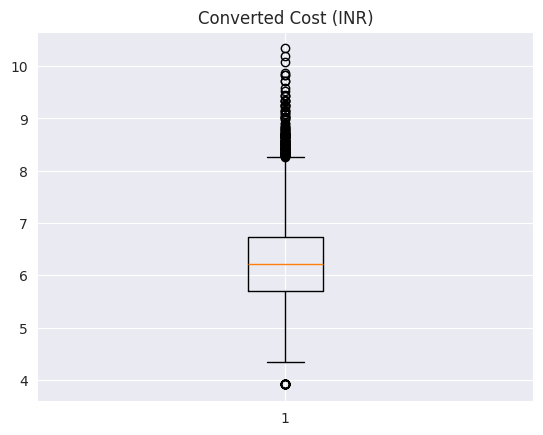

In [51]:
#outliers
for feature in numerical_columns:
  data=df.copy()
  data[feature]=np.log(data[feature])
  plt.boxplot(data[feature])
  plt.title(feature)
  plt.show()

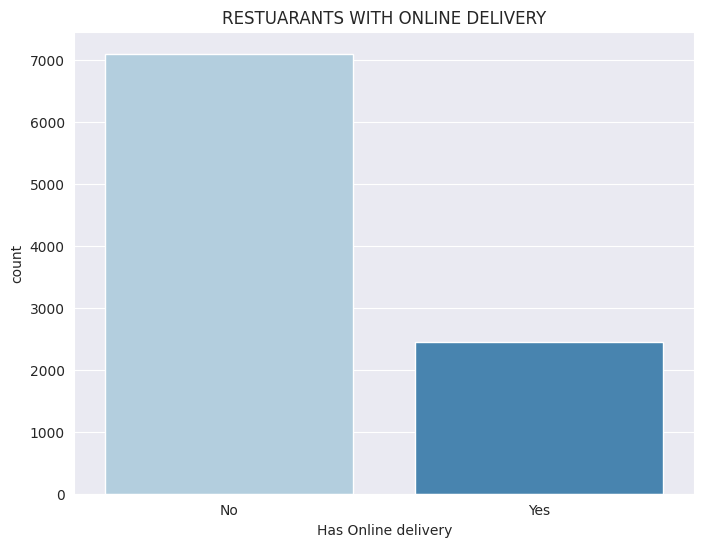

In [52]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = "Has Online delivery", data = df, palette = 'Blues')
plt.title("RESTUARANTS WITH ONLINE DELIVERY")
plt.show()

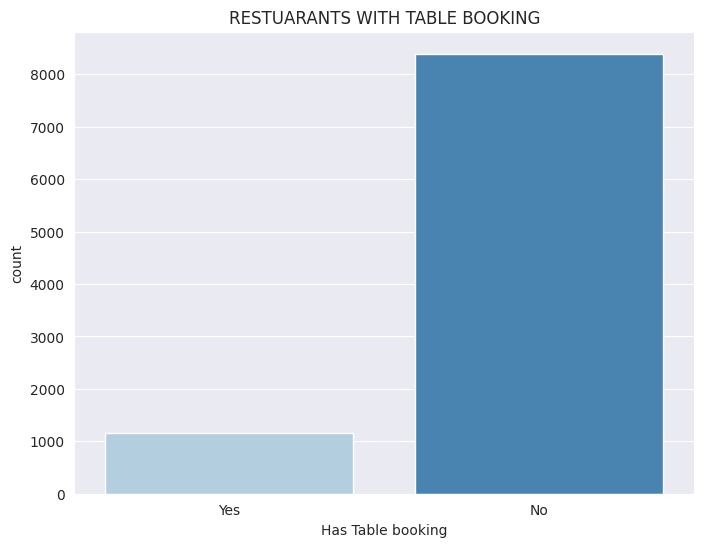

In [53]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = "Has Table booking", data = df, palette = 'Blues')
plt.title("RESTUARANTS WITH TABLE BOOKING")
plt.show()

<Axes: >

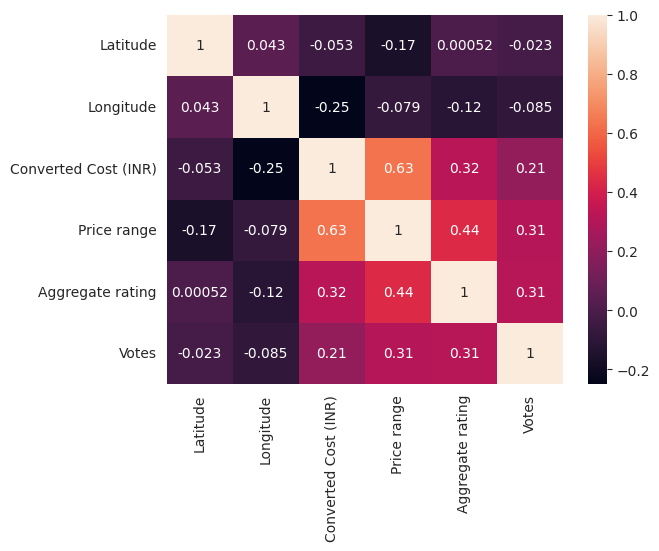

In [54]:
df_corr = df[['Latitude', 'Longitude', 'Converted Cost (INR)', 'Price range', 'Aggregate rating', 'Votes']].dropna().corr()
sns.heatmap(df_corr, annot=True)

Text(0.5, 1.0, 'Top 10 Restaurants by Votes')

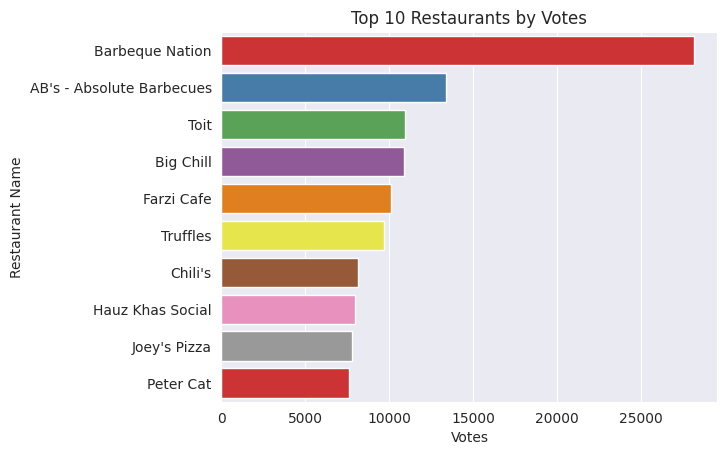

In [58]:
#Top 10 restaurants by votes
votes = df.groupby('Restaurant Name')['Votes'].sum().reset_index()
votes = votes.sort_values(by='Votes', ascending=False)
sns.barplot(x='Votes', y='Restaurant Name', palette='Set1', data=votes[:10])
plt.title('Top 10 Restaurants by Votes')

Text(0.5, 1.0, 'Top 10 Restaurants by Aggregate rating')

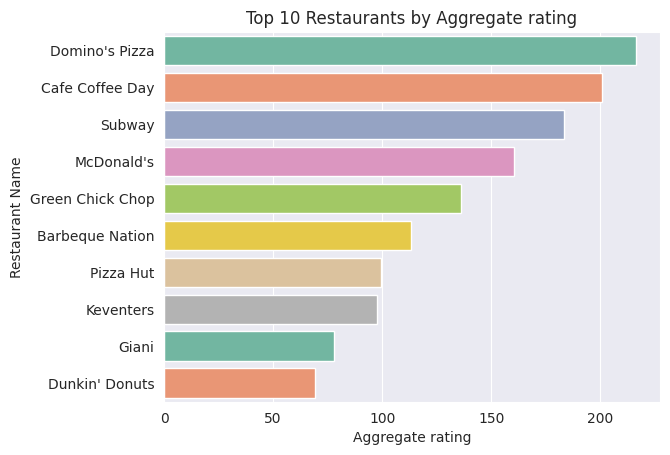

In [59]:
#Top 10 restaurants by Aggregate rating
votes = df.groupby('Restaurant Name')['Aggregate rating'].sum().reset_index()
votes = votes.sort_values(by='Aggregate rating', ascending=False)
sns.barplot(x='Aggregate rating', y='Restaurant Name', palette='Set2', data=votes[:10])
plt.title('Top 10 Restaurants by Aggregate rating')

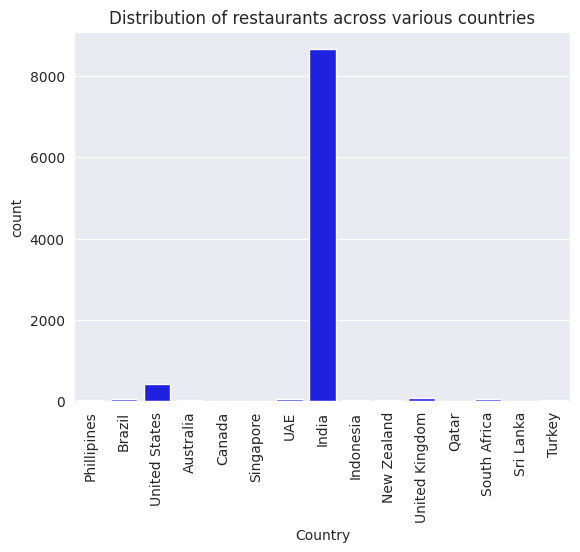

In [63]:
#Distribution of restaurants across various countries
sns.countplot(x='Country', data=df, color='b')
plt.xticks(rotation=90)
plt.title('Distribution of restaurants across various countries')
plt.show()

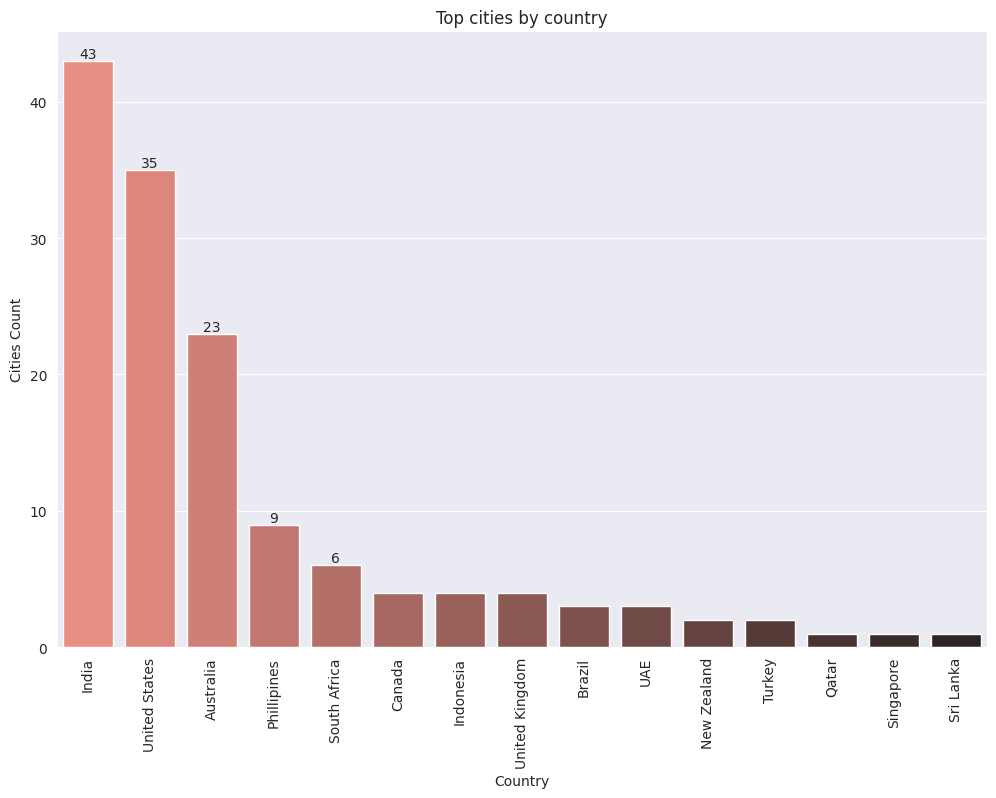

In [64]:
#Top cities by country
city_counts = list()
for i in df.groupby(['Country','City']).count().index:
  city_counts.append(i[0])
city_counts = dict(Counter(city_counts))
city_counts = dict(sorted(city_counts.items(), key=lambda x:x[1], reverse=True))
country = list(city_counts.keys())
counts = list(city_counts.values())
fig = plt.figure(figsize=(12,8))
plt.xlabel('Country')
plt.ylabel('Cities Count')
plt.xticks(rotation=90)
ax = sns.barplot(x=country, y=counts, palette='dark:salmon_r')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])
plt.title('Top cities by country')
plt.show()

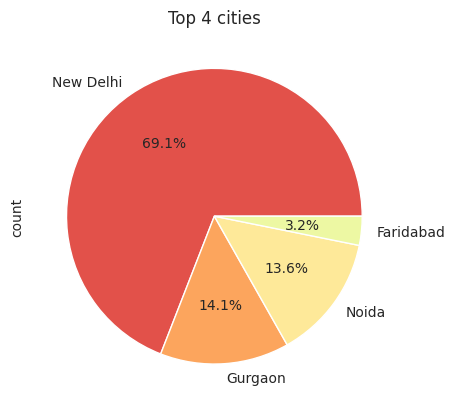

In [66]:
#Top 4 cities
df['City'].value_counts()[:4].plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Spectral'))
plt.title('Top 4 cities')
plt.show()

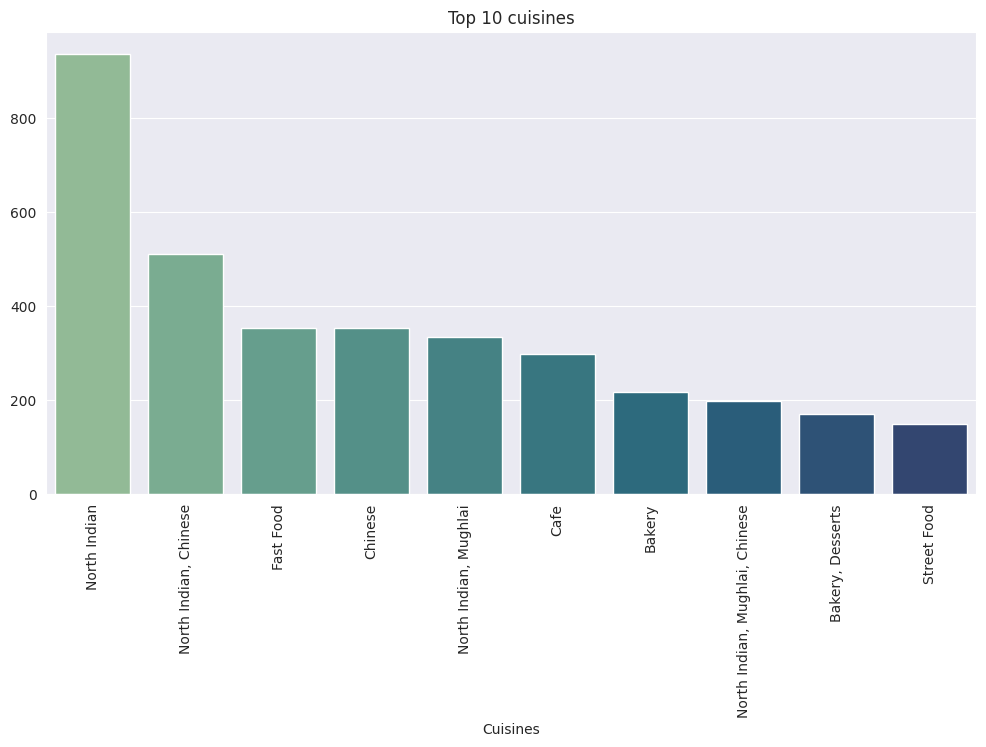

In [69]:
#Top 10 cuisines
countries = df['Cuisines'].value_counts().index[:10]
values = df['Cuisines'].value_counts().values[:10]
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(x=countries, y=values, palette='crest')
plt.title('Top 10 cuisines')
plt.show()

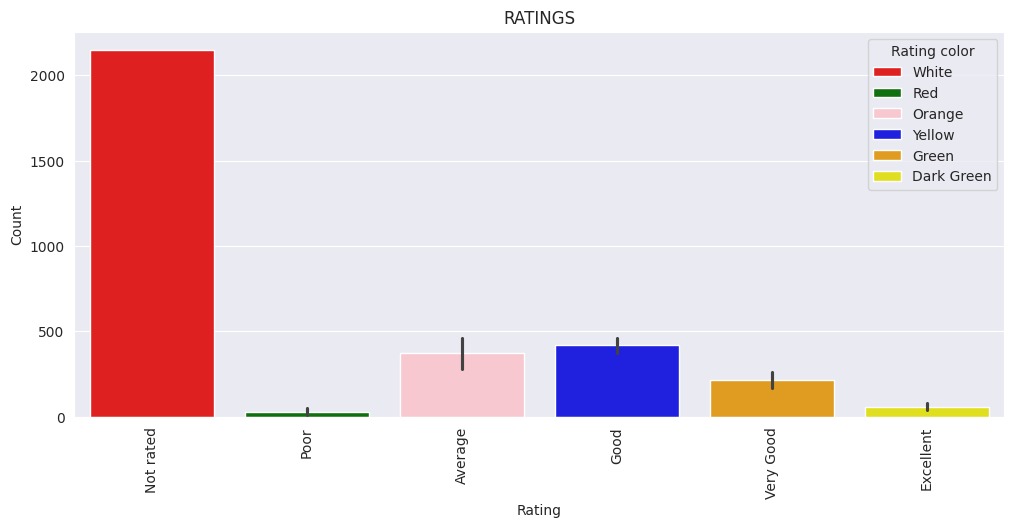

In [74]:
#Distribution of ratings
plt.figure(figsize=(12,5))
rating = df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
sns.barplot(x='Rating text', y='Rating Count', hue='Rating color', data=rating, palette=['red', 'green', 'pink', 'blue', 'orange', 'yellow'])
plt.xticks(rotation=90)
plt.xlabel("Rating")
plt.ylabel('Count')
plt.title('RATINGS')
plt.show()

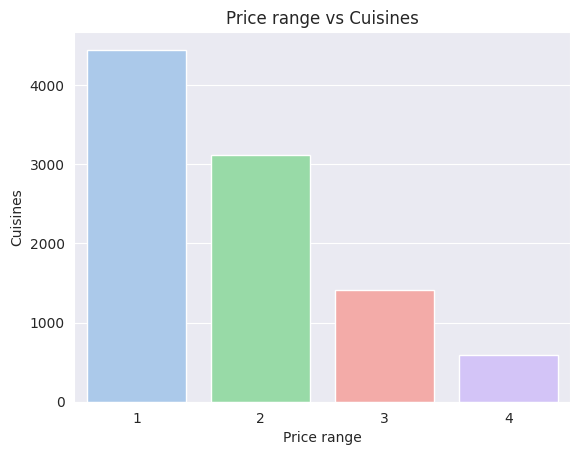

In [77]:
cuisines = df.groupby('Price range')['Cuisines'].count().reset_index()
sns.barplot(data=cuisines, x='Price range', y='Cuisines', palette=['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff'])
plt.title('Price range vs Cuisines')
plt.show()

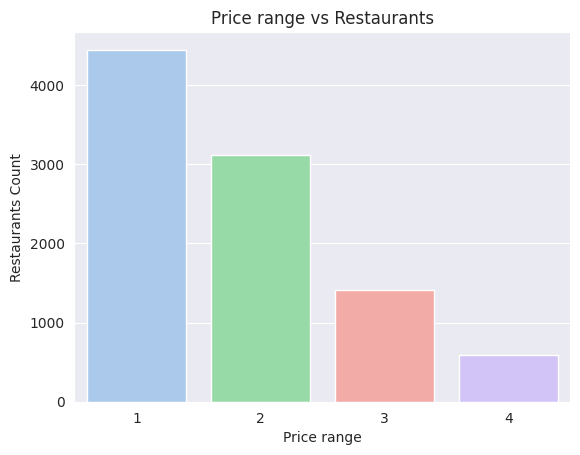

In [79]:
restaurants = df.groupby('Price range')['Restaurant Name'].count().reset_index()
sns.barplot(data=restaurants, x='Price range', y='Restaurant Name', palette=['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff'])
plt.title('Price range vs Restaurants')
plt.ylabel('Restaurants Count')
plt.show()

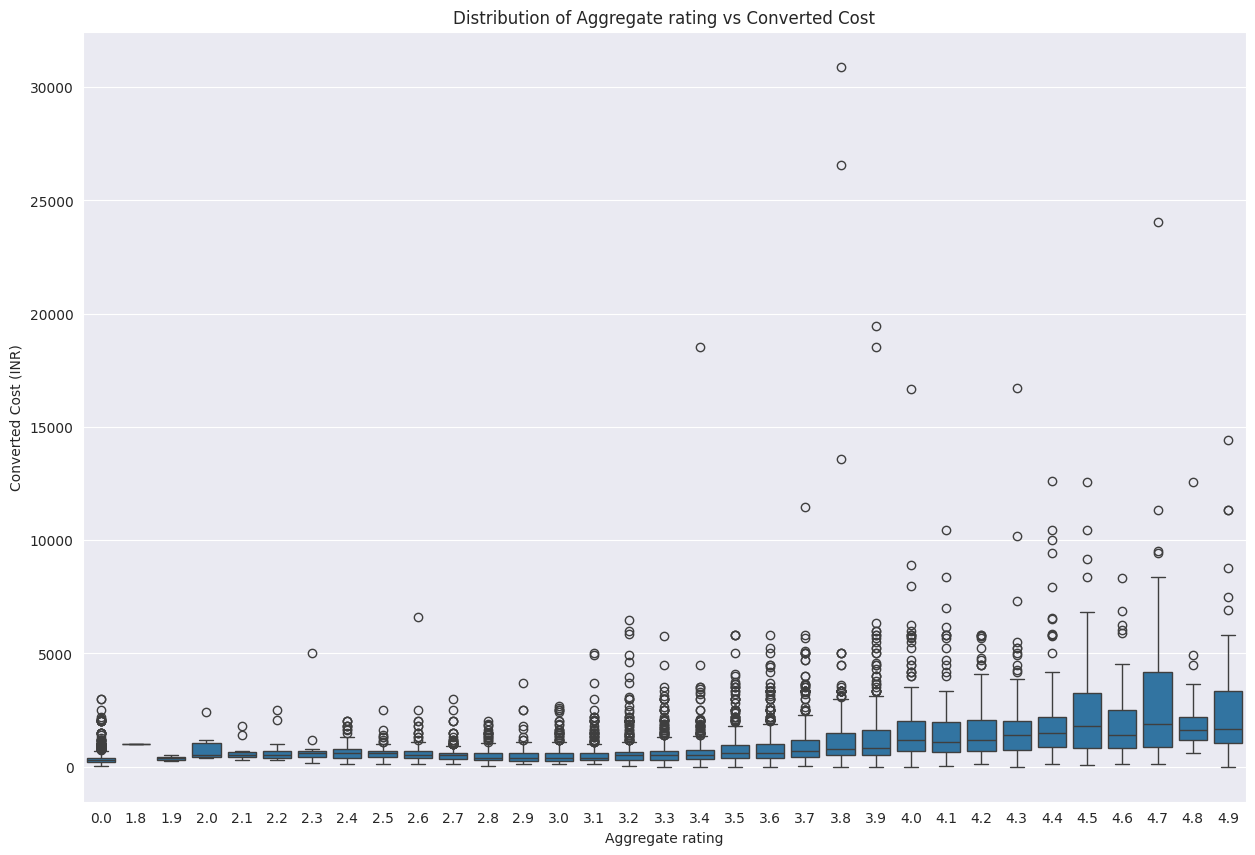

In [80]:
#Distribution of Aggregate rating vs Converted Cost (INR)
plt.figure(figsize=(15,10))
sns.boxplot(x='Aggregate rating', y='Converted Cost (INR)', data=df)
plt.xlabel('Aggregate rating')
plt.ylabel('Converted Cost (INR)')
plt.title('Distribution of Aggregate rating vs Converted Cost')
plt.show()

In [81]:
#Function to count the numbers of cuisines
def cuisine_counter(Str):
  Num_of_Cuisines=len(str(Str).split(','))
  return(Num_of_Cuisines)

In [82]:
#Creating a new feature in data
#We will further explore the new feature just like other features
df['CuisineCount']=df['Cuisines'].apply(cuisine_counter)
df.head(5)

,Restaurant Name,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Exchange Rate(INR),Converted Cost (INR),CuisineCount
0,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,1.46,1606.0,3
1,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,1.46,1752.0,1
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines,1.46,5840.0,4
3,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines,1.46,2190.0,2
4,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines,1.46,2190.0,2
